In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Data

In [7]:
df = pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

## Basic info about our data

In [8]:
df.sample(5)

,breadcrumb,created_at,price_currency,price_details,price_value,seller_address,seller_name,seller_type,feature_czujniki-parkowania-przednie,feature_poduszka-powietrzna-chroniąca-kolana,feature_kurtyny-powietrzne,feature_klimatyzacja-dwustrefowa,feature_światła-led,feature_czujnik-zmierzchu,feature_elektrycznie-ustawiane-lusterka,feature_asr-(kontrola-trakcji),feature_poduszka-powietrzna-kierowcy,feature_cd,feature_elektryczne-szyby-przednie,feature_poduszka-powietrzna-pasażera,feature_system-start-stop,feature_światła-do-jazdy-dziennej,feature_komputer-pokładowy,feature_elektryczne-szyby-tylne,feature_klimatyzacja-manualna,feature_tapicerka-welurowa,feature_czujnik-deszczu,feature_światła-przeciwmgielne,feature_ogrzewanie-postojowe,feature_radio-niefabryczne,feature_regulowane-zawieszenie,feature_ogranicznik-prędkości,feature_zmieniarka-cd,feature_szyberdach,feature_isofix,feature_asystent-pasa-ruchu,feature_alufelgi,feature_bluetooth,feature_nawigacja-gps,feature_asystent-parkowania,...,param_particle-filter,param_zarejestrowany-w-polsce,param_oferta-od,param_moc,param_make,param_kraj-pochodzenia,param_engine-power,param_year,param_serwisowany-w-aso,param_rodzaj-paliwa,param_możliwość-finansowania,param_registered-in-poland,param_transmission,param_miesięczna-rata,param_kod-silnika,param_version,param_opłata-początkowa,param_model-pojazdu,param_pojemność-skokowa,param_kierownica-po-prawej-(anglik),param_fuel-type,param_vat-free,param_acrylic,param_damaged,param_door-count,param_tuning,param_filtr-cząstek-stałych,param_nr-of-seats,param_kolor,param_engine-capacity,param_pearl,param_stan,param_wersja,param_emisja-co2,param_body-type,param_matowy,param_bezwypadkowy,param_akryl-(niemetalizowany),param_monthly-payment-value,car_id
84057,"[Osobowe, Volkswagen, Golf, Volkswagen Golf IV...","17:25, 5 marca 2018",PLN,"Cena Brutto, Do negocjacji",8900.0,"Kościerzyna, kościerski, Pomorskie",None,Osoba prywatna,False,False,False,False,False,False,True,False,True,True,True,True,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,...,None,Tak,Osoby prywatnej,90 KM,None,Niemcy,None,None,None,Diesel,None,None,None,None,None,None,None,Golf,1 900 cm3,None,None,None,None,None,None,None,None,None,Czarny,None,None,Używane,IV (1997-2006),None,None,None,Tak,None,None,84057
159278,"[Osobowe, Subaru, Impreza, Subaru Impreza GH (...","12:11, 2 marca 2018",PLN,"Cena Brutto, Do negocjacji, Faktura VAT",27980.0,"Maszewska 5 a - 72-100 Goleniów, goleniowski, ...",Gol-Drex Centrum Sprzedaży Samochodów Używanyc...,Dealer,False,False,True,False,False,False,True,False,True,True,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,...,None,Tak,Firmy,150 KM,None,Polska,None,None,None,Benzyna,Tak,None,None,None,None,None,None,Impreza,2 000 cm3,None,None,None,None,None,None,None,None,None,Niebieski,None,None,Używane,GH (2007-),None,None,None,None,None,None,159278
117925,"[Osobowe, Dacia, Sandero, Dacia Sandero II (20...","11:37, 3 marca 2018",PLN,Cena Brutto,24500.0,"Lawendowa 12 - 34-300 Żywiec, żywiecki, Śląski...",import export,Dealer,True,False,False,False,True,False,True,True,True,True,True,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,...,None,None,Firmy,73 KM,None,Austria,None,None,Tak,Benzyna,None,None,None,None,None,None,None,Sandero,1 000 cm3,None,None,None,None,None,None,None,None,None,Biały,None,None,Używane,II (2012-),None,None,None,None,None,None,117925


In [21]:
df.columns.values

array(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       'feature_kurtyny-powietrzne', 'feature_klimatyzacja-dwustrefowa',
       'feature_światła-led', 'feature_czujnik-zmierzchu',
       'feature_elektrycznie-ustawiane-lusterka',
       'feature_asr-(kontrola-trakcji)',
       'feature_poduszka-powietrzna-kierowcy', 'feature_cd',
       'feature_elektryczne-szyby-przednie',
       'feature_poduszka-powietrzna-pasażera',
       'feature_system-start-stop', 'feature_światła-do-jazdy-dziennej',
       'feature_komputer-pokładowy', 'feature_elektryczne-szyby-tylne',
       'feature_klimatyzacja-manualna', 'feature_tapicerka-welurowa',
       'feature_czujnik-deszczu', 'feature_światła-przeciwmgielne',
       'feature_ogrzewanie-postojowe', 'feature_radio-niefabryczne',
       'feature_regulowane-zaw

In [86]:
df['price_value'].describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

In [90]:
df.groupby('param_marka-pojazdu')['price_value'].median().sort_values(ascending=False)

param_marka-pojazdu
McLaren        572000.0
Maybach        489000.0
Tesla          377450.0
Ferrari        326900.0
Lamborghini    323250.0
                 ...   
Zaporożec        3900.0
Zastava          2999.0
Daewoo           2850.0
Talbot           2499.0
Tarpan           1400.0
Name: price_value, Length: 100, dtype: float64

In [89]:
df.groupby('param_marka-pojazdu')['price_value'].mean().sort_values(ascending=False)

param_marka-pojazdu
Maybach        489000.000000
McLaren        454580.000000
Bentley        393963.157895
Ferrari        389748.560000
Lamborghini    372400.000000
                   ...      
Zaporożec        3900.000000
Daewoo           3651.895522
Zastava          2999.000000
Talbot           2499.000000
Tarpan           1400.000000
Name: price_value, Length: 100, dtype: float64

## Price diagrams

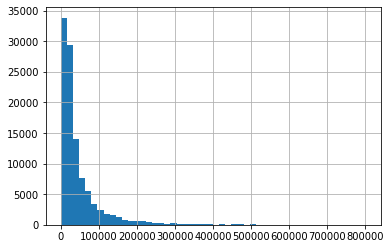

In [14]:
df['price_value'].hist(bins=50)

In [68]:
df.groupby('param_marka-pojazdu')['price_value'].median().sort_values(ascending=False)

param_marka-pojazdu
McLaren        572000.0
Maybach        489000.0
Tesla          377450.0
Ferrari        326900.0
Lamborghini    323250.0
                 ...   
Zaporożec        3900.0
Zastava          2999.0
Daewoo           2850.0
Talbot           2499.0
Tarpan           1400.0
Name: price_value, Length: 100, dtype: float64

In [70]:
def plot_function(groupby, column, agg_table=[np.mean,np.median, np.size], sort='mean', top=50, subplots=False):
  (
  df
  .groupby(groupby)[column]
  .agg(agg_table)
  .sort_values(by = sort, ascending=False)
  .head(top)

  ).plot(kind='bar', figsize=(18,6), subplots=subplots)

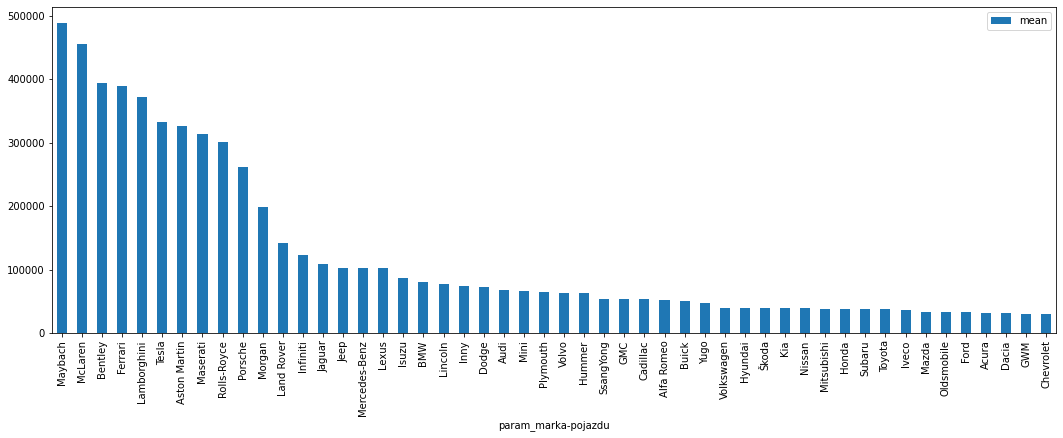

In [74]:
plot_function(groupby='param_marka-pojazdu', column='price_value', agg_table=[np.mean])

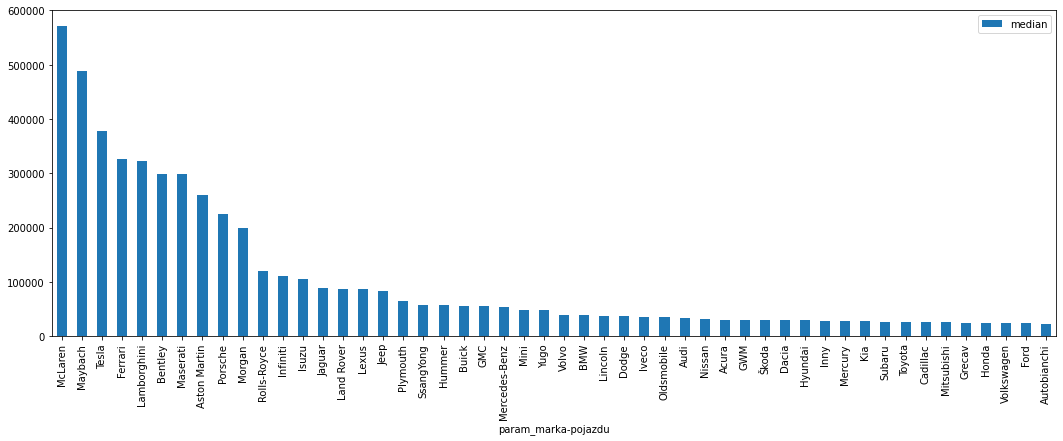

In [76]:
plot_function(groupby='param_marka-pojazdu', column='price_value', agg_table=[np.median], sort='median')

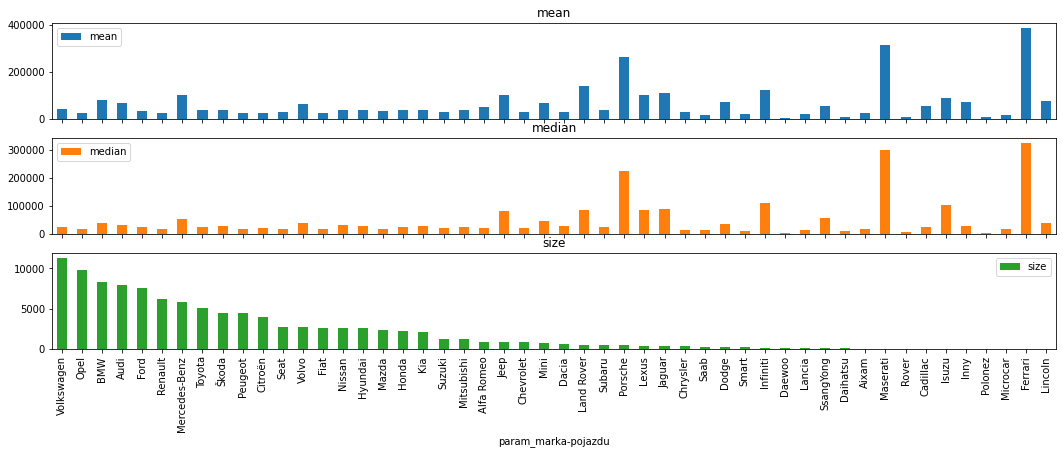

In [77]:
plot_function(groupby='param_marka-pojazdu', column='price_value', subplots=True, sort='size')